In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 
Diberikan citra rice, Lakukan deteksi tepi pada citra tersebut dan jelaskan perbedaan hasilnya menggunakan operator Laplace dan operator Laplace of Gaussian (LoG) berikut:

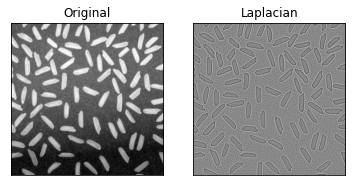

In [13]:
# operator laplace
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/rice.png')

# konversi warna ke abu
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# hilangkan noise menggunakan gaussian blur
img = cv.GaussianBlur(gray,(3,3),0)

# proses konvolusi menggunakan kernel
laplacian = cv.Laplacian(img,cv.CV_64F)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  if sys.path[0] == '':


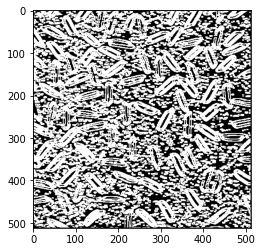

In [14]:
# operator LoG
import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import data    
import cv2 as cv

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/rice.png')  # use a standard image from skimage instead
LoG = nd.gaussian_laplace(img , 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (np.zeros == 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

plt.imshow(output)
plt.show()

Operator laplace merupakan operator yang digunakan untuk mendeteksi tepi pada gambar menggunakan turunan orde dua. Operator ini menggunakan diskontinuitas tingkat keabuan dalam citra yang menghasilkan tepi keabuan dan diskontinu pada latar yang gelap. Sehingga akhir citra menghasilkan tepi ke dalam dan ke luar dalam sebuah gambar.

Sedangkan operator laplacian of gaussian (log) mendeteksi tepi yang dapat mengurangi noise. Dikarenakan fungsi gaussian yang dapat menghaluskan/smooth citra dan berdampak pada pengurangan noise. Hasilnya jumlah tepi yang salah terdeteksi dapat dikurangi.



# 2
Lakukan filter Sobel, Prewitt, Roberts untuk deteksi tepi pada citra berikut boat, lena, bird, dan peppers. Tentukan dan jelaskan metode terbaik untuk masing-masing citra.

(Text(0.5, 1.0, 'sobel y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

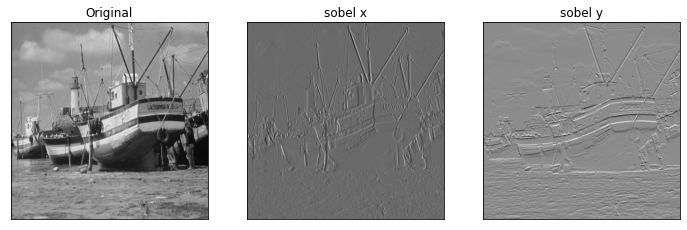

In [94]:
# sobel boat
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/boat.tiff',0)

sobelx = cv.Sobel(img, cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img, cv.CV_64F,0,1,ksize=3)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx,cmap="gray")
plt.title('sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobely, cmap="gray")
plt.title('sobel y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'prewitt y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

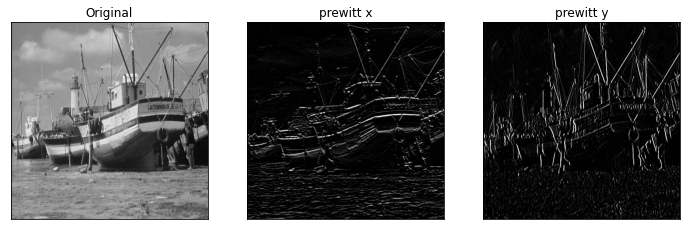

In [93]:
# prewitt boat

import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/boat.tiff', cv.IMREAD_GRAYSCALE)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(prewittx,cmap="gray")
plt.title('prewitt x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(prewitty,cmap="gray")
plt.title('prewitt y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'robert'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

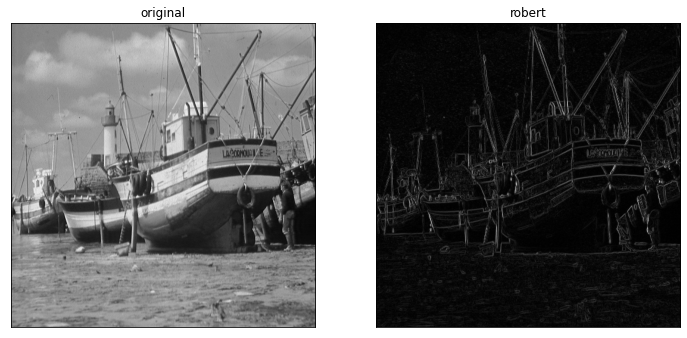

In [92]:
# robert boat

import cv2 as cv
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/boat.tiff",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure(figsize=(12,12))
plt.subplot(1,2,1),plt.imshow(img,cmap="gray")
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(edged_img,cmap="gray")
plt.title('robert'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'sobel y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

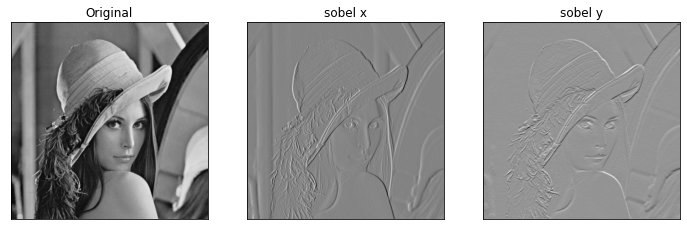

In [91]:
# sobel lena
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/lena.bmp',0)

sobelx = cv.Sobel(img, cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img, cv.CV_64F,0,1,ksize=3)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx,cmap="gray")
plt.title('sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobely,cmap="gray")
plt.title('sobel y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'prewitt y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

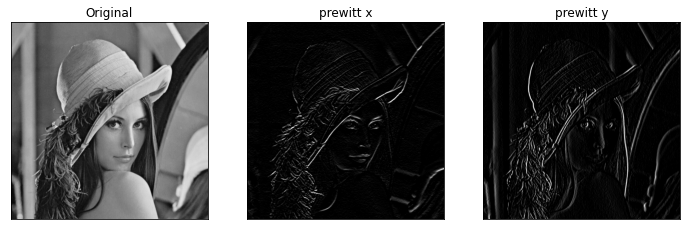

In [90]:
# prewitt lena

import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/lena.bmp', cv.IMREAD_GRAYSCALE)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(prewittx,cmap="gray")
plt.title('prewitt x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(prewitty,cmap="gray")
plt.title('prewitt y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'robert'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

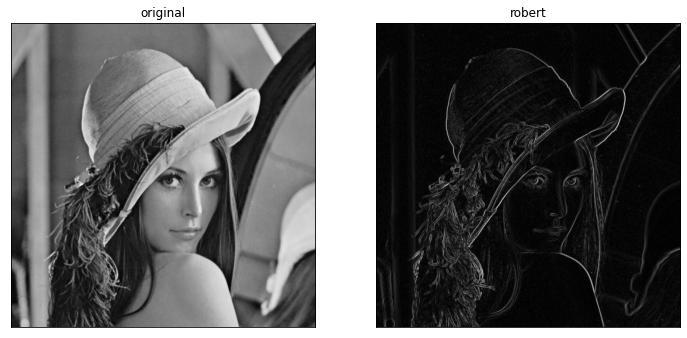

In [89]:
# robert lena

import cv2 as cv
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/lena.bmp",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure(figsize=(12,12))
plt.subplot(1,2,1),plt.imshow(img,cmap="gray")
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(edged_img,cmap="gray")
plt.title('robert'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'sobel y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

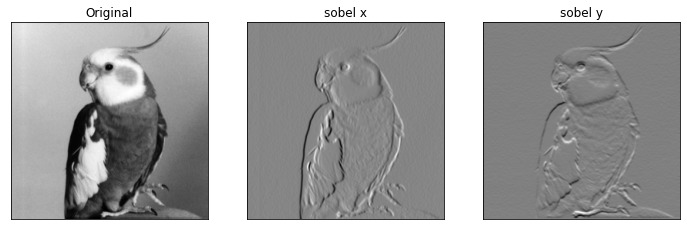

In [88]:
# sobel bird
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/bird.bmp',0)


sobelx = cv.Sobel(img, cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img, cv.CV_64F,0,1,ksize=3)

plt.figure(figsize=(12,12))
plt.subplot(2,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,2),plt.imshow(sobelx,cmap="gray")
plt.title('sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,3),plt.imshow(sobely,cmap="gray")
plt.title('sobel y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'prewitt y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

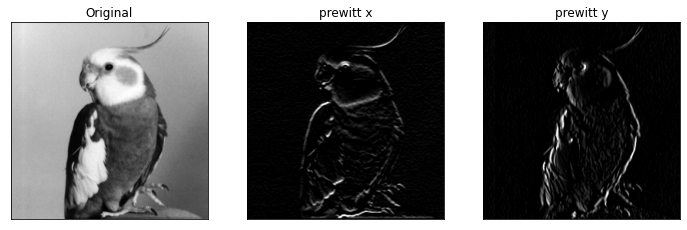

In [87]:
# prewitt bird

import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/bird.bmp', cv.IMREAD_GRAYSCALE)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(prewittx,cmap="gray")
plt.title('prewitt x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(prewitty,cmap="gray")
plt.title('prewitt y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'robert'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

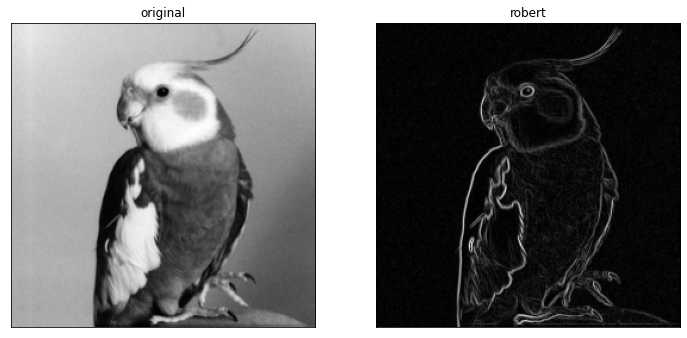

In [86]:
# robert bird

import cv2 as cv
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/bird.bmp",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure(figsize=(12,12))
plt.subplot(1,2,1),plt.imshow(img,cmap="gray")
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(edged_img,cmap="gray")
plt.title('robert'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'sobel y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

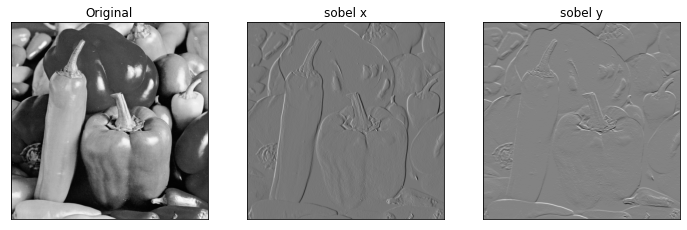

In [85]:
# sobel peppers
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/peppers.tiff',0)
sobelx = cv.Sobel(img, cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img, cv.CV_64F,0,1,ksize=3)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx,cmap="gray")
plt.title('sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobely,cmap="gray")
plt.title('sobel y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'prewitt y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

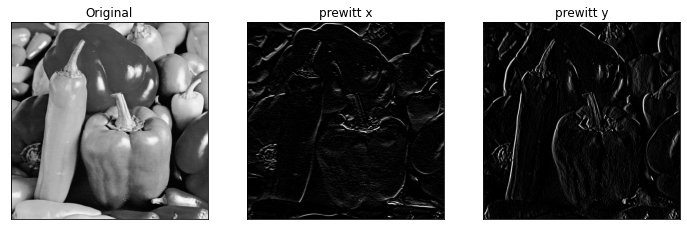

In [84]:
# prewitt peppers

import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/peppers.tiff', cv.IMREAD_GRAYSCALE)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(prewittx,cmap="gray")
plt.title('prewitt x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(prewitty,cmap="gray")
plt.title('prewitt y'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'robert'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

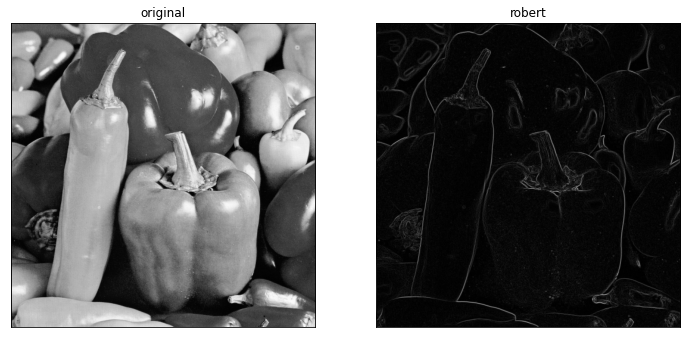

In [83]:
# robert peppers

import cv2 as cv
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/peppers.tiff",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure(figsize=(12,12))
plt.subplot(1,2,1),plt.imshow(img,cmap="gray")
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(edged_img,cmap="gray")

plt.title('robert'), plt.xticks([]), plt.yticks([])

- Metode deteksi tepi Roberts adalah operator pendeteksian tepi berbasis gradient dengan mengambil arah diagonal untuk penentuan arah serta mencari perbedaan (differensial) pada arah horizontal dan perbedaan vertical, dengan
ditambahkan proses konversi biner 

- Metode Sobel merupakan salah satu pengembangan metode Robert dengan menggunakan High Pass Filter (HPF). Metode sobel merupakan salah satu operator yang menghindari adanya perhitungan gradient di titik interpolasi.
Operator ini menggunakan kernel ukuran 3x3 piksel untuk perhitungan gradient sehingga perkiraan gradient berada tepat di tengah jendela

- Metode prewitt menggunakan persamaan yang sama dengan operator sobel. Operator prewitt tidak menekankan pembobotan pada piksel - piksel yang lebih dekat dengan titik pusat kernel. Metode ini mengambil prinsip dari fungsi laplacian yang dikenal sebagai fungsi untuk membangkitkan High Pass Filter 

Dari metode-metode yang digunakan pada setiap citra, operator sobel mendeteksi lebih banyak tepi dan terlihat dibandingkan prewitt dan roberts, ini karena sobel menambahkan bobot pada intensitas pixel di sekitar tepi. 












# 3
Lakukan deteksi tepi pada citra lena_noise dengan filter Canny.

(Text(0.5, 1.0, 'canny'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

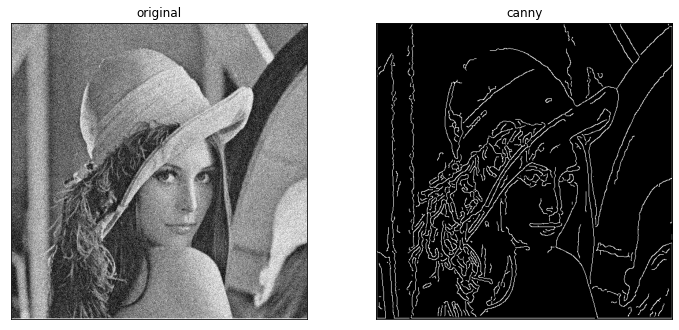

In [73]:
import cv2 as cv
from skimage import feature
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/lena_noise.jpg")
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gauss = cv.GaussianBlur(gray,(3,3),0)
canny = feature.canny(gray,sigma=2)

plt.figure(figsize=(12,12))

plt.subplot(2,2,1),plt.imshow(img1,cmap="gray")
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(canny,cmap="gray")
plt.title('canny'), plt.xticks([]), plt.yticks([])

# 4
Lakukan deteksi tepi pada citra lena_noise dengan terlebih dahulu melakukan median filter dilanjutkan dengan filter Canny.

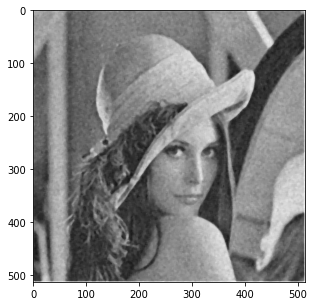

In [101]:
import cv2 as cv
from skimage import feature
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Citra Digital/tugas citra 2/lena_noise.jpg')
img_median = cv.medianBlur(img, 5) 

plt.figure(figsize=(5,5))
plt.imshow(img_median)

(Text(0.5, 1.0, 'canny with median'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

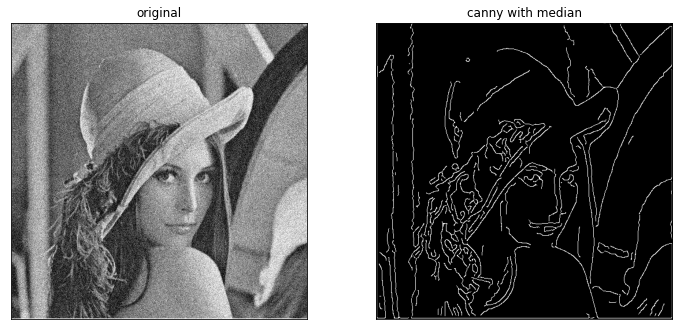

In [102]:
img1 = cv.cvtColor(img_median,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img_median, cv.COLOR_BGR2GRAY)
gauss = cv.GaussianBlur(gray,(3,3),0)
canny = feature.canny(gray,sigma=2)

plt.figure(figsize=(12,12))

plt.subplot(2,2,1),plt.imshow(img,cmap="gray")
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(canny,cmap="gray")
plt.title('canny with median'), plt.xticks([]), plt.yticks([])